NUAA 数模协会 2023.11.26 优化模型分享(李柯辰)

## 1. 整数规划
可以解决什么问题？
1. 背包问题
2. 指派问题等


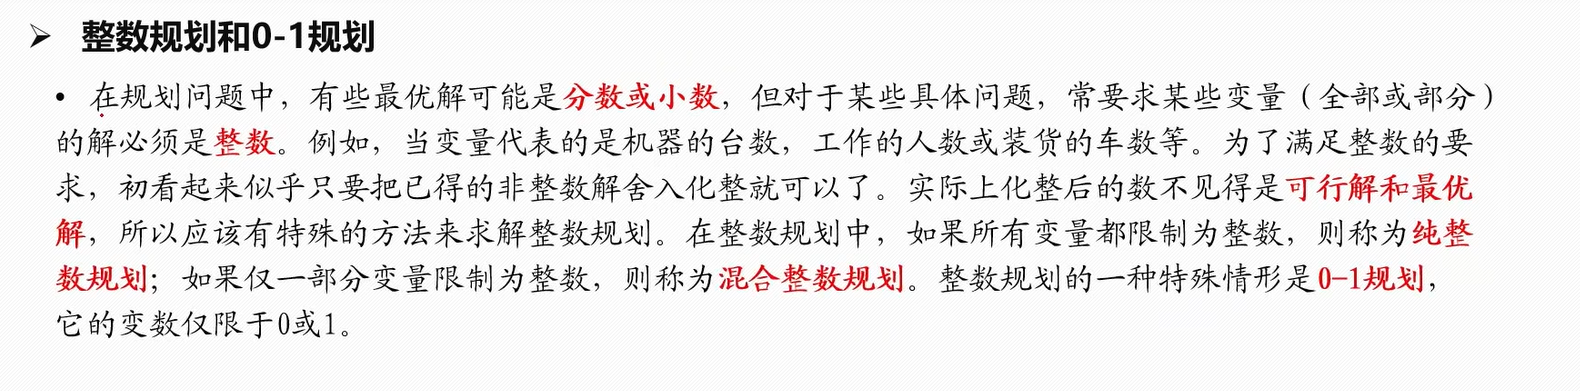
### 1.1 整数变量
求解下列整数线性规划问题:

$$
\begin{array}{ll}
\min & z=40 x_{1}+90 x_{2}, \\
\text { s.t. } & \left\{\begin{array}{l}
9 x_{1}+7 x_{2} \leqslant 56, \\
7 x_{1}+20 x_{2} \geqslant 70, \\
x_{1}, x_{2} \geqslant 0 \text { 为整数. }
\end{array}\right.
\end{array}
$$

这个公式是在求解线性规划问题中的最小值。它表示的是一个二元一次不等式组，其中$x_1$和$x_2$是变量，$40x_1+90x_2$是目标函数，$\min$表示的是目标函数的最小值。

这个公式中的$\min$函数是这样定义的：对于所有满足约束条件的$(x_1, x_2)$对，计算$40x_1+90x_2$的值，然后找出这个值的最小整数值。

这个公式中的$\text{s.t.}$符号表示的是约束条件。它表示的是一个不等式组，其中$9x_1+7x_2\leq56$ 和 $7x_1+20x_2\geq70$都是约束条件，$x_1$ 和 $x_2$必须为整数，也就是说，$x_1$ 和 $x_2$ 的取值必须在0到7之间(包括0和7),并且$x_1$的取值必须在1到8之间(包括1和8),$x_2$的取值必须在0到5之间(包括0和5)。

我们可以通过这个公式找到一个满足所有约束条件的解，然后根据这个解来求解目标函数的最小值。

In [13]:
# CVXPY是一个专门用于凸优化问题的Python内嵌建模语言。
# 它允许你以自然的方式表达你的问题，而不需要按照求解者所要求的限制性标准形式。
import cvxpy as cp
import numpy as np

# 定义目标函数系数向量c
c = np.array([40, 90])

# 定义约束矩阵a和右侧向量b
a = np.array([[9, 7], [-7, -20]])
b = np.array([56, -70])

# 定义决策变量x，它是一个长度为2的整数向量
x = cp.Variable(2, integer=True)

# 定义目标函数，即最小化c与x的内积
obj = cp.Minimize(c@x)

# 定义约束条件，包括线性不等式约束a@x <= b和非负约束x >= 0
cons = [a@x <= b, x >= 0]

# 创建优化问题对象prob，并指定目标函数和约束条件
prob = cp.Problem(obj, cons)

prob.solve(solver='GLPK_MI')
print("最优值为：", prob.value)
print("最优解为：", x.value)

最优值为： 350.0
最优解为： [2. 3.]


### 1.2 整数规划习题
**销售代理点售书**

一家出版社准备在某市建立两个销售代理点, 向7个区的大学生售书, 每个区的大学生数量 (单位: 千人) 表示在下图上. 每个销售代理点只能向本区和一个相邻区的大学生售书, 这两个销售代理点应该建在何处, 才能使所能供应的大学生的数量最大? 建立该问题的整数线性规划模型并求解.

目标是最大化每个社区的销售中心带来的收益。 

![](images/销售点售书.png)

解: 将大学生数量为$34,29,42,21,56,18,71$的区分别标号为$1,2,3,4,5,6,7$区, 划出区与区之间的相邻关系图:

![](images/销售解答.png)

#### 模型建立

首先将区域标号1,2,3,4,5,6,7分别代表人数为34,29,42,21,56,18,71的区域。用$ r_i $表示第$ i $个区大学生的数量。

用$ a_{ij} $表示第$ i $个区和第$j$个区是否相邻：

$a_{i,j} =1$表示i小区和j小区相邻, i,j=1..7,j>i

$a_{i,j} =0$表示i小区和j小区不相邻, i,j=1..7,j>i


用$ x_{ij} $表示是否选择向第$ i $个区和第$ j $个区的大学生售书，

$ x_{ij}=1 $，向第i个和第j个区的大学生同时售书，$ x_{ij}=0 $，不向第i个和第j个区的大学生售书，其中$ i=1,\cdots,7,j=1,\cdots,7$。


目标函数：
 $
 \max = {\sum_{i=1}^{7}\sum_{j=i+1}^{7}{(r_i + r_j)}x_{ij}}
$

约束条件1：相邻才能被选中
$x_{ij}\le a_{ij}$

约束条件2 :
排除特殊情况：

$x_{1,2} = 1,x_{1,3} = 1$,
$x_{1,3} = 1,x_{3,4} = 1$

$
\sum_{i=1}^{7}{x_{ij} + x_{ji}\le1}, j=1,\cdots,7
$

约束条件3：总共有两对代理点被选中,考虑到对称性，累计求和应该是2。

$\sum_{i=1}^{7}\sum_{j=i+1}^{7}{x_{ij}=2}$

联合目标函数和约束条件在一起，我们得到如下模型：
$
\begin{array}
\max \max= \sum_{i=1}^{7} \sum_{j=1}^{7} (r_i + r_j) x_{ij}\\
\text{s.t.}
\begin{cases}
x_{ij}=0, 1,i=1,\cdots,7,j=i+1,\cdots,7  \\
x_{ij}\le a_{ij} \\
\sum_{i=1}^{7}{x_{ij} + x_{ji}\le1}, j=1,\cdots,7\\
 \sum_{i=1}^{7}\sum_{j=1}^{7}{x_{ij}=2}
\end{cases}
\end{array}
$

In [12]:
"""
社区设置销售中心问题
"""
# 用gurobi求解
import gurobipy as gp
from gurobipy import GRB


n = 7  # 7个社区

# 社区的大学生人数
r = [34, 29, 42, 21, 56, 18, 71]
# 社区的相邻关系
a = [[0, 1, 1, 0, 0, 0, 0],
		[1, 0, 1, 1, 1, 0, 0],
		[1, 1, 0, 1, 0, 0, 0],
		[0, 1, 1, 0, 1, 1, 1],
		[0, 1, 0, 1, 0, 1, 0],
		[0, 0, 0, 1, 1, 0, 1],
		[0, 0, 0, 1, 0, 1, 0]]

# 建立模型
model = gp.Model("district")

# 变量设定
# x(i,j) 表示(i,j)是否同时被选中
x = model.addVars(n, n, vtype=GRB.BINARY, name='x')

# 设置目标函数
links = [(i, j) for i in range(n) for j in range(n)]
obj = gp.quicksum((r[i]+r[j])*x[i, j]/2 for (i, j) in links)
model.setObjective(obj, GRB.MAXIMIZE)

# 总数2对的约束
model.addConstr(gp.quicksum(x[i, j] for (i, j) in links) == 4)

# 约束条件：相邻才能被选中
for (i, j) in links:
	model.addConstr(x[i, j] <= a[i][j])

# x(i,j) = x(j,i)
for (i, j) in links:
	model.addConstr(x[i, j] == x[j, i])

# 约束条件 : 每一个社区只能选中一个相邻的小区
for i in range(n):
	model.addConstr(gp.quicksum(x[i, j] for j in range(n)) <= 1)

# 约束条件 : 每一个社区只能选中一个相邻的小区
for j in range(n):
	model.addConstr(gp.quicksum(x[i, j] for i in range(n)) <= 1)

model.optimize()

print('目标函数值: %g' % model.objVal)
for i in range(n):
	for j in range(i+1, n):
		if x[i, j].x > 0:
			print('x[%d][%d]=%d' % (i, j, x[i, j].x), end=',')
			print('r[%d] =%d, r[%d]=%d' % (i, r[i], j, r[j]))



Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i5-12600K, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 113 rows, 49 columns and 280 nonzeros
Model fingerprint: 0xa3891911
Variable types: 0 continuous, 49 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 153.0000000
Presolve removed 105 rows and 40 columns
Presolve time: 0.00s
Presolved: 8 rows, 9 columns, 27 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)
Found heuristic solution: objective 166.0000000

Root relaxation: objective 1.770000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It

In [6]:
# 用cvxpy求解
import numpy as np
import cvxpy as cp


n = 7

# 社区的大学生人数
r = [34, 29, 42, 21, 56, 18, 71]

# 社区的相邻关系a_{ij} 注意：i>=j时，a_{ij}=0
a = np.array([[0, 1, 1, 0, 0, 0, 0],
             [0, 0, 1, 1, 1, 0, 0],
             [0, 0, 0, 1, 0, 0, 0],
             [0, 0, 0, 0, 1, 1, 1],
             [0, 0, 0, 0, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 1],
             [0, 0, 0, 0, 0, 0, 0]])

# 表示出目标函数系数r_i + r_j
s = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        s[i][j] = r[i] + r[j]
# 另一种方式
s1 = np.array([[ri + rj for ri in r] for rj in r])

# 决策变量
x = cp.Variable((n, n), boolean=True)

# 目标函数
obj = cp.Maximize(cp.sum(cp.multiply(s, x)))

# 全体约束条件
constraints = []

# 约束条件1：相邻才能被选中
con1 = x <= a
constraints.append(con1)

# 约束条件2：总共有两对代理点被选中,考虑到对称性，累计求和应该是2
con2 = cp.sum(x) == 2
constraints.append(con2)

# 约束条件3：排除特殊情况
con3 = cp.sum(x, axis=1, keepdims=False) + cp.sum(x, axis=0,
                                                  keepdims=False) <= 1  # 体会keepdims = False的妙用
constraints.append(con3)

# 约束条件3：排除特殊情况另一种写法
# for i in range(n):
#     con = cp.sum([x[k][i]+x[i][k] for k in range(n)]) <= 1
#     constraints.append(con)

# 构建模型
prob = cp.Problem(obj, constraints)

# 求解模型
prob.solve()
print("最优值为：", prob.value)


print("具体结果")
for i in range(n):
    for j in range(n):
        if x.value[i, j] > 0:
            print(i+1, j+1, x.value[i, j], s[i, j])

最优值为： 177.0
具体结果
2 5 1.0 85.0
4 7 1.0 92.0


**该代码的结果:**
目标函数值: 177

x[1][4]=1,r[1] =29, r[4]=56

x[3][6]=1,r[3] =21, r[6]=71
